# Pandas quick start
Pandas is a 3rd-party, open source, library used to for data science. It is perhaps the most important library for you, as a student of analytics.

At a high level, Pandas provides the following functionality:
1. Reading and writing data in various formats: csv, sql, feather and many others
2. A set of data structures in which to store data (so higher level than lists, tuples and dictionaries)
3. Functions to transform data in _many_ ways: individual columns, operating on multiple columns at once, aggregating in total or in by categories (aka group by), visualizing datasets, etc.

Further, _upstream_ libraries, such as ones providing machine learning algorithms (scikit-learn) know how to consume Pandas data structures.

Extremely helpful Pandas cheatsheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf (search the web, there are many more, just as useful)

In [5]:
import numpy as np # <= numpy is only used once, for the np.log function (although pandas is built on top of it)
import pandas as pd # <= `pd` is almost always the abbreviation used for pandas

import seaborn as sns # <= seaborn is not part of pandas, but very useful charting library (built on top of matplotlib)
from bokeh.plotting import figure, show, output_file # <= another charting library, can be more interactive
from bokeh.io import output_notebook

import os
import sys

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path: sys.path.append(module_path)

from src import utils

In [6]:
# remember, since we will be drawing some charts, we need to execute this line - because seaborn uses matplotlib
%matplotlib inline 

# the following line tells pandas to avoid scietific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# bokeh code to make it work in jupyter notebooks
output_notebook()

Loading BokehJS ...

In [10]:
%reload_ext post_content
%post_content register YOUR_USER_NAME

PostContent loaded
Registered


## Quick walk-through of Pandas

### Load file and take a quick look at it

Note that this file is available at: https://www.kaggle.com/kumarajarshi/life-expectancy-who/home
Go to that URL, click 'Download' which will start downloading a zip file. Load it as shown below:

In [8]:
# Read csv file
life_df = pd.read_csv("../../datasets/life-expectancy/life-expectancy-who.zip2", compression='zip')

In [9]:
life_df.head() # Look at the first 5 lines to visually inspect data

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing             65.00           263.00   
1  Afghanistan  2014  Developing             59.90           271.00   
2  Afghanistan  2013  Developing             59.90           268.00   
3  Afghanistan  2012  Developing             59.50           272.00   
4  Afghanistan  2011  Developing             59.20           275.00   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01                   71.28        65.00      1154  ...   
1             64     0.01                   73.52        62.00       492  ...   
2             66     0.01                   73.22        64.00       430  ...   
3             69     0.01                   78.18        67.00      2787  ...   
4             71     0.01                    7.10        68.00      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS    GDP  Population  \
0   6.00               8.16        65.00       0.10 584.26 33736494.00   
1  58.00               8.18        62.00       0.10 612.70   327582.00   
2  62.00               8.13        64.00       0.10 631.74 31731688.00   
3  67.00               8.52        67.00       0.10 669.96  3696958.00   
4  68.00               7.87        68.00       0.10  63.54  2978599.00   

    thinness  1-19 years   thinness 5-9 years  \
0                  17.20                17.30   
1                  17.50                17.50   
2                  17.70                17.70   
3                  17.90                18.00   
4                  18.20                18.20   

   Income composition of resources  Schooling  
0                             0.48      10.10  
1                             0.48      10.00  
2                             0.47       9.90  
3                             0.46       9.80  
4                             0.45       9.50  

[5 rows x 22 columns]

In [5]:
life_df.shape # This file has 2,938 records (rows) and 11 columns

(2938, 22)

In [6]:
life_df.columns # List of columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

**WARNING** Notice that some columns have an extra space!

In [7]:
life_df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [8]:
life_df.describe() # quick summary of all the columns

Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
count 2938.00           2928.00          2928.00        2938.00  2744.00   
mean  2007.52             69.22           164.80          30.30     4.60   
std      4.61              9.52           124.29         117.93     4.05   
min   2000.00             36.30             1.00           0.00     0.01   
25%   2004.00             63.10            74.00           0.00     0.88   
50%   2008.00             72.10           144.00           3.00     3.75   
75%   2012.00             75.70           228.00          22.00     7.70   
max   2015.00             89.00           723.00        1800.00    17.87   

       percentage expenditure  Hepatitis B  Measles     BMI   \
count                 2938.00      2385.00   2938.00 2904.00   
mean                   738.25        80.94   2419.59   38.32   
std                   1987.91        25.07  11467.27   20.04   
min                      0.00         1.00      0.00    1.00   
25%                      4.69        77.00      0.00   19.30   
50%                     64.91        92.00     17.00   43.50   
75%                    441.53        97.00    360.25   56.20   
max                  19479.91        99.00 212183.00   87.30   

       under-five deaths    Polio  Total expenditure  Diphtheria    HIV/AIDS  \
count             2938.00 2919.00            2712.00      2919.00    2938.00   
mean                42.04   82.55               5.94        82.32       1.74   
std                160.45   23.43               2.50        23.72       5.08   
min                  0.00    3.00               0.37         2.00       0.10   
25%                  0.00   78.00               4.26        78.00       0.10   
50%                  4.00   93.00               5.75        93.00       0.10   
75%                 28.00   97.00               7.49        97.00       0.80   
max               2500.00   99.00              17.60        99.00      50.60   

            GDP    Population   thinness  1-19 years   thinness 5-9 years  \
count   2490.00       2286.00                2904.00              2904.00   
mean    7483.16   12753375.12                   4.84                 4.87   
std    14270.17   61012096.51                   4.42                 4.51   
min        1.68         34.00                   0.10                 0.10   
25%      463.94     195793.25                   1.60                 1.50   
50%     1766.95    1386542.00                   3.30                 3.30   
75%     5910.81    7420359.00                   7.20                 7.20   
max   119172.74 1293859294.00                  27.70                28.60   

       Income composition of resources  Schooling  
count                          2771.00    2775.00  
mean                              0.63      11.99  
std                               0.21       3.36  
min                               0.00       0.00  
25%                               0.49      10.10  
50%                               0.68      12.30  
75%                               0.78      14.30  
max                               0.95      20.70

In [31]:
life_df.describe().T # Flip or `transpose` the data for easier viewing

count        mean         std     min  \
Year                            2938.00     2007.52        4.61 2000.00   
Life expectancy                 2928.00       69.22        9.52   36.30   
Adult Mortality                 2928.00      164.80      124.29    1.00   
infant deaths                   2938.00       30.30      117.93    0.00   
Alcohol                         2744.00        4.60        4.05    0.01   
percentage expenditure          2938.00      738.25     1987.91    0.00   
Hepatitis B                     2385.00       80.94       25.07    1.00   
Measles                         2938.00     2419.59    11467.27    0.00   
 BMI                            2904.00       38.32       20.04    1.00   
under-five deaths               2938.00       42.04      160.45    0.00   
Polio                           2919.00       82.55       23.43    3.00   
Total expenditure               2712.00        5.94        2.50    0.37   
Diphtheria                      2919.00       82.32       23.72    2.00   
 HIV/AIDS                       2938.00        1.74        5.08    0.10   
GDP                             2490.00     7483.16    14270.17    1.68   
Population                      2286.00 12753375.12 61012096.51   34.00   
 thinness  1-19 years           2904.00        4.84        4.42    0.10   
 thinness 5-9 years             2904.00        4.87        4.51    0.10   
Income composition of resources 2771.00        0.63        0.21    0.00   
Schooling                       2775.00       11.99        3.36    0.00   

                                      25%        50%        75%           max  
Year                              2004.00    2008.00    2012.00       2015.00  
Life expectancy                     63.10      72.10      75.70         89.00  
Adult Mortality                     74.00     144.00     228.00        723.00  
infant deaths                        0.00       3.00      22.00       1800.00  
Alcohol                              0.88       3.75       7.70         17.87  
percentage expenditure               4.69      64.91     441.53      19479.91  
Hepatitis B                         77.00      92.00      97.00         99.00  
Measles                              0.00      17.00     360.25     212183.00  
 BMI                                19.30      43.50      56.20         87.30  
under-five deaths                    0.00       4.00      28.00       2500.00  
Polio                               78.00      93.00      97.00         99.00  
Total expenditure                    4.26       5.75       7.49         17.60  
Diphtheria                          78.00      93.00      97.00         99.00  
 HIV/AIDS                            0.10       0.10       0.80         50.60  
GDP                                463.94    1766.95    5910.81     119172.74  
Population                      195793.25 1386542.00 7420359.00 1293859294.00  
 thinness  1-19 years                1.60       3.30       7.20         27.70  
 thinness 5-9 years                  1.50       3.30       7.20         28.60  
Income composition of resources      0.49       0.68       0.78          0.95  
Schooling                           10.10      12.30      14.30         20.70

### Visualize data

C:\Users\p\Anaconda3\envs\msca\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\p\Anaconda3\envs\msca\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Wall time: 34.7 s


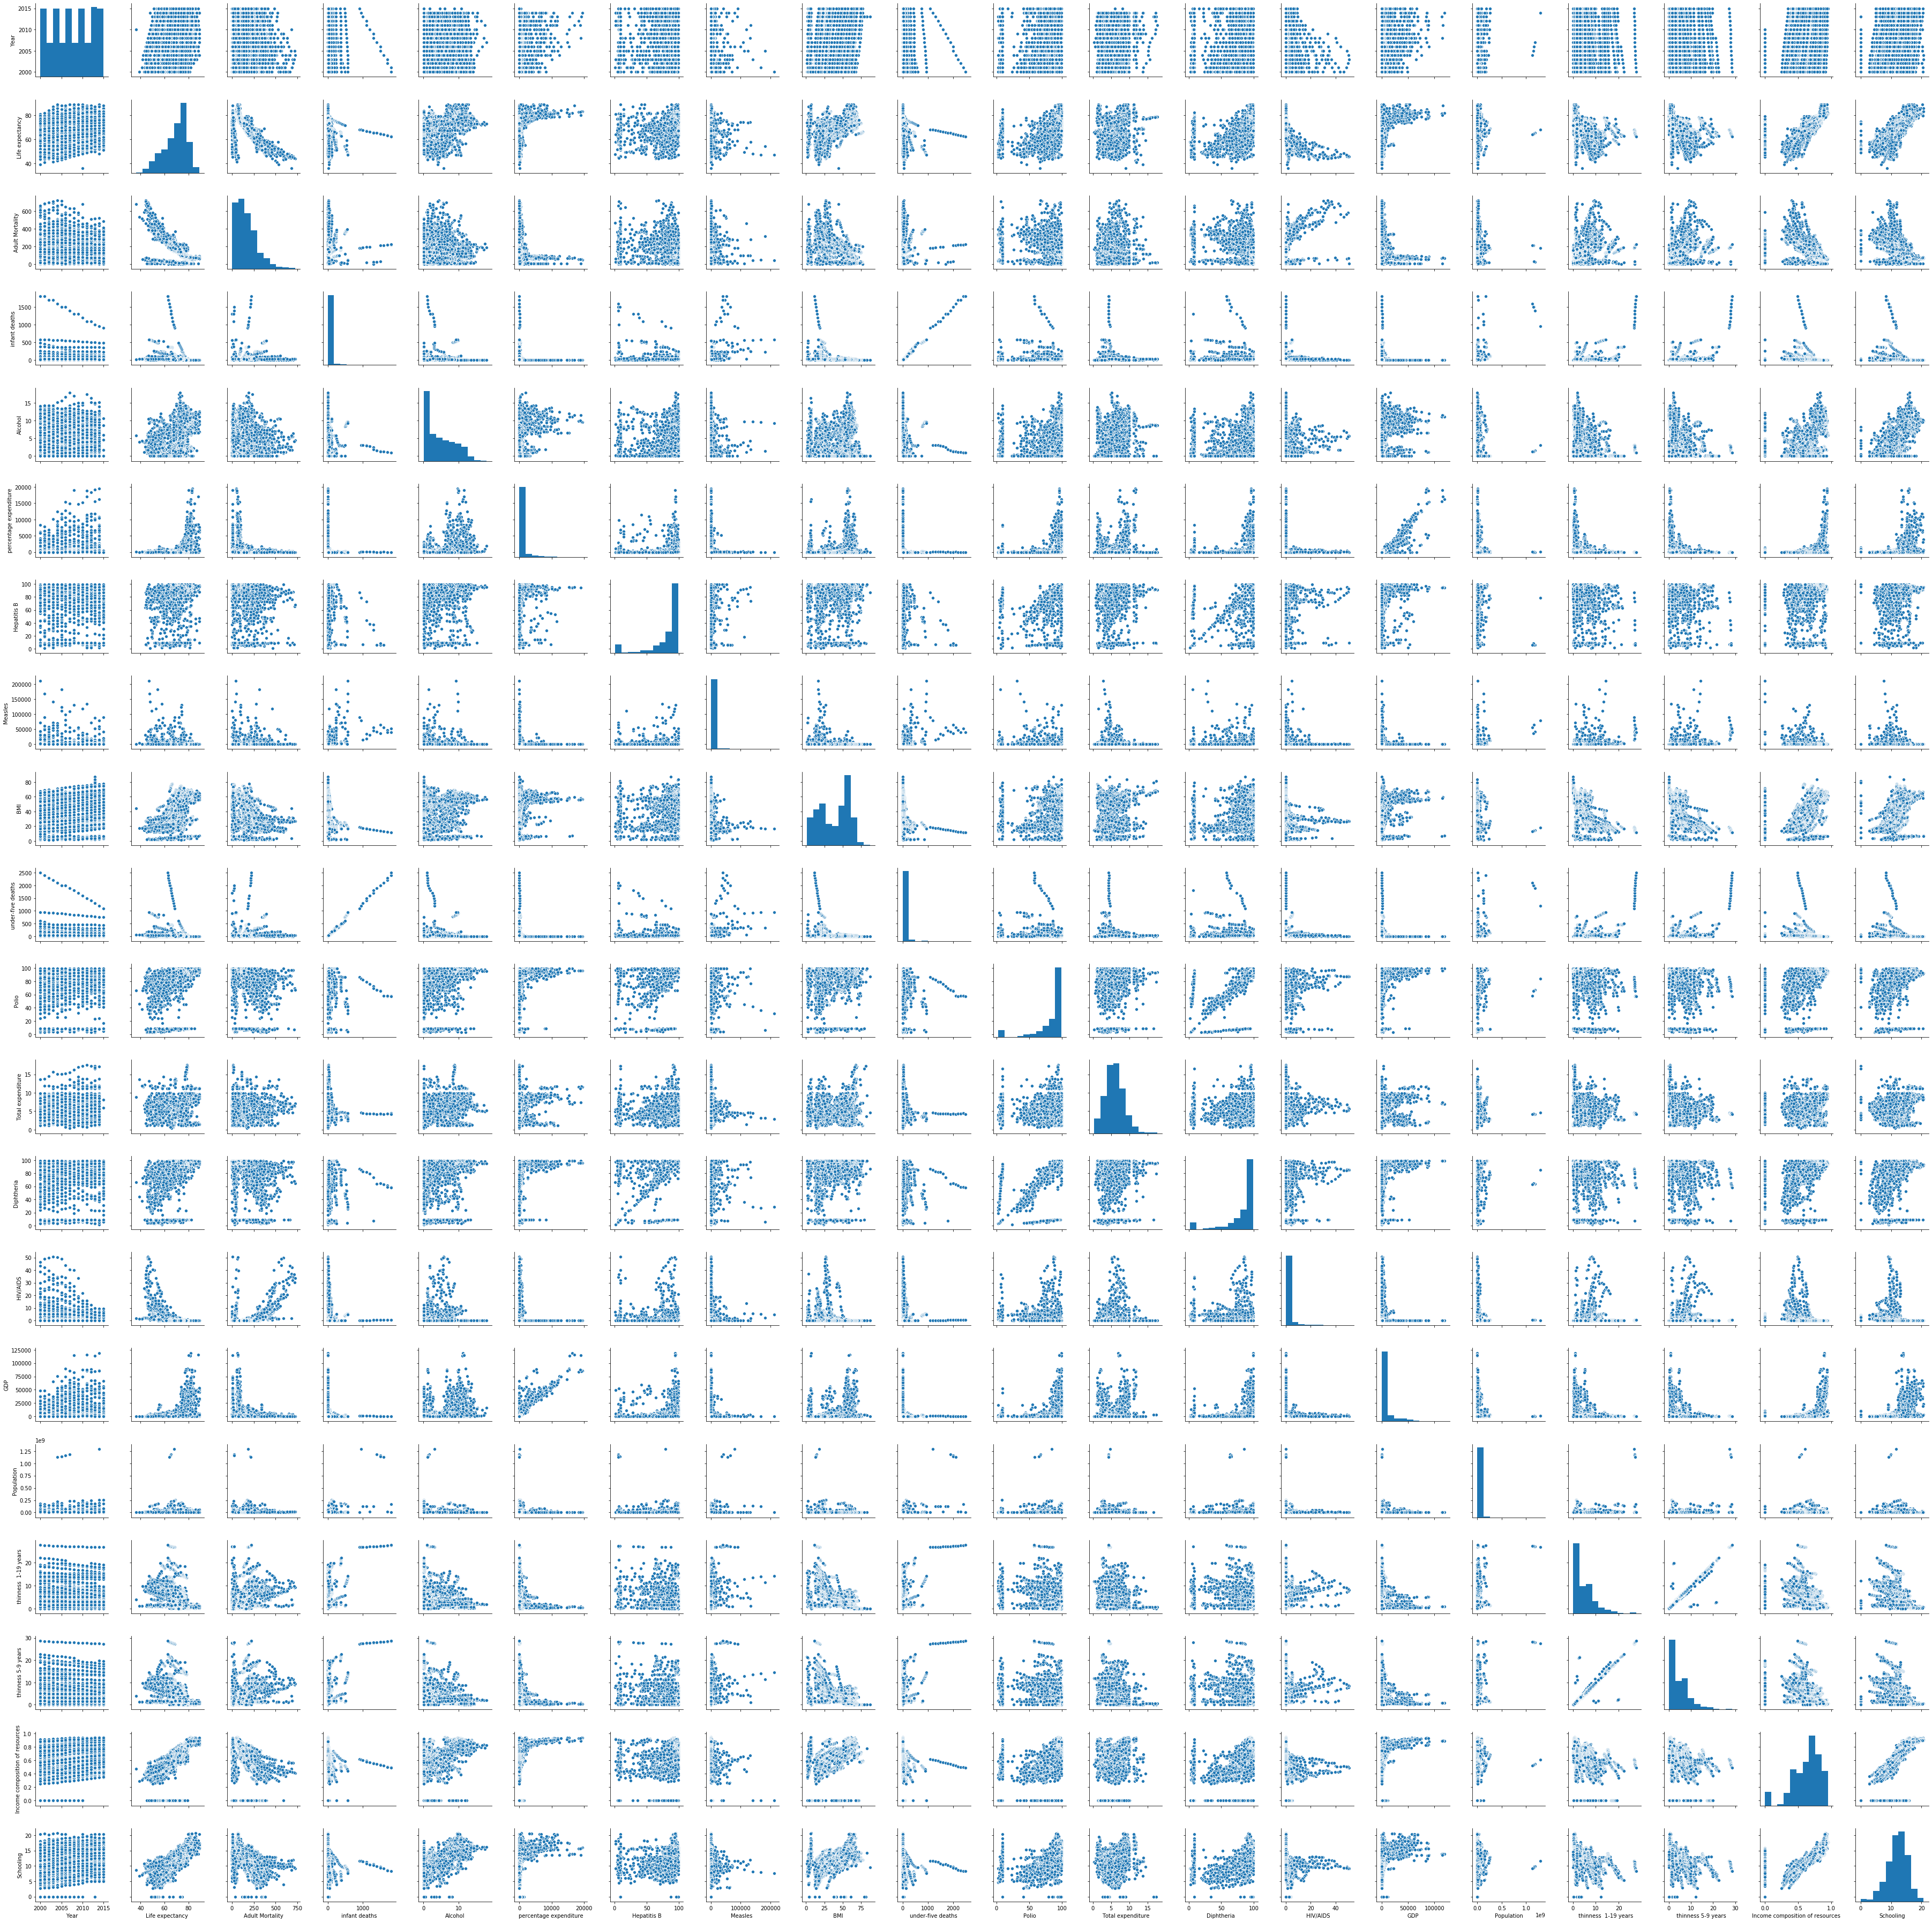

In [9]:
# Warning, this step may take a minute or two to complete
%time sns.pairplot(life_df) # look at all variables at once - pair-plot

The previous plot isn't very useful because there are too many columns. What if we had fewer columns? Let's just select the first few columns:

In [10]:
first_few_df = life_df[['Country', 'Year', 'Population', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ']]
first_few_df.head()

Country  Year  Population  Life expectancy   Adult Mortality  \
0  Afghanistan  2015 33736494.00             65.00           263.00   
1  Afghanistan  2014   327582.00             59.90           271.00   
2  Afghanistan  2013 31731688.00             59.90           268.00   
3  Afghanistan  2012  3696958.00             59.50           272.00   
4  Afghanistan  2011  2978599.00             59.20           275.00   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   
0             62     0.01                   71.28        65.00      1154  
1             64     0.01                   73.52        62.00       492  
2             66     0.01                   73.22        64.00       430  
3             69     0.01                   78.18        67.00      2787  
4             71     0.01                    7.10        68.00      3013

### Selecting columns

Given dataframe `df`, you select columns by passing it a list of columns:

```python
list_of_cols = ['col1', 'col2', 'col3']
df[list_of_cols]
```

or

```python
df[['col1', 'col2', 'col3']] # <= notice two square brackets!
```

**Exercise** Pick columns 'Country', 'Year' and 'Population' from dataframe 'life_df'

In [ ]:
%%post_content exercise_030_a

#type your answer here

Let's also limit the data to the year 2015

In [11]:
first_few_2015_df = first_few_df[first_few_df.Year == 2015]
first_few_2015_df

Country  Year  Population  Life expectancy   \
0                            Afghanistan  2015 33736494.00             65.00   
16                               Albania  2015    28873.00             77.80   
32                               Algeria  2015 39871528.00             75.60   
48                                Angola  2015  2785935.00             52.40   
64                   Antigua and Barbuda  2015         nan             76.40   
...                                  ...   ...         ...               ...   
2858  Venezuela (Bolivarian Republic of)  2015         nan             74.10   
2874                            Viet Nam  2015         nan             76.00   
2890                               Yemen  2015         nan             65.70   
2906                              Zambia  2015   161587.00             61.80   
2922                            Zimbabwe  2015 15777451.00             67.00   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0              263.00             62     0.01                   71.28   
16              74.00              0     4.60                  364.98   
32              19.00             21      nan                    0.00   
48             335.00             66      nan                    0.00   
64              13.00              0      nan                    0.00   
...               ...            ...      ...                     ...   
2858           157.00              9      nan                    0.00   
2874           127.00             28      nan                    0.00   
2890           224.00             37      nan                    0.00   
2906            33.00             27      nan                    0.00   
2922           336.00             22      nan                    0.00   

      Hepatitis B  Measles   
0           65.00      1154  
16          99.00         0  
32          95.00        63  
48          64.00       118  
64          99.00         0  
...           ...       ...  
2858        87.00         0  
2874        97.00       256  
2890        69.00       468  
2906         9.00         9  
2922        87.00         0  

[183 rows x 10 columns]

In [12]:
first_few_2015_df.shape

(183, 10)

### Selecting rows
Given dataframe `df`, a criteria can be given as an expression which returns `True` for every row which should be selected

```python
criterion = df.col1 < 5
df[criterion]
```
or

```python
df[df.col1 < 5]
```

**Exercise** Show rows in 'df' for Afghanistan

In [ ]:
%%post_content exercise_030_b

#type your answer here

#### Modern Pandas suggests using `.loc[]` to select rows and columns

In [16]:
life_df.loc[life_df.Year == 2015, ['Country']].shape

(183, 1)

Wall time: 6.06 s


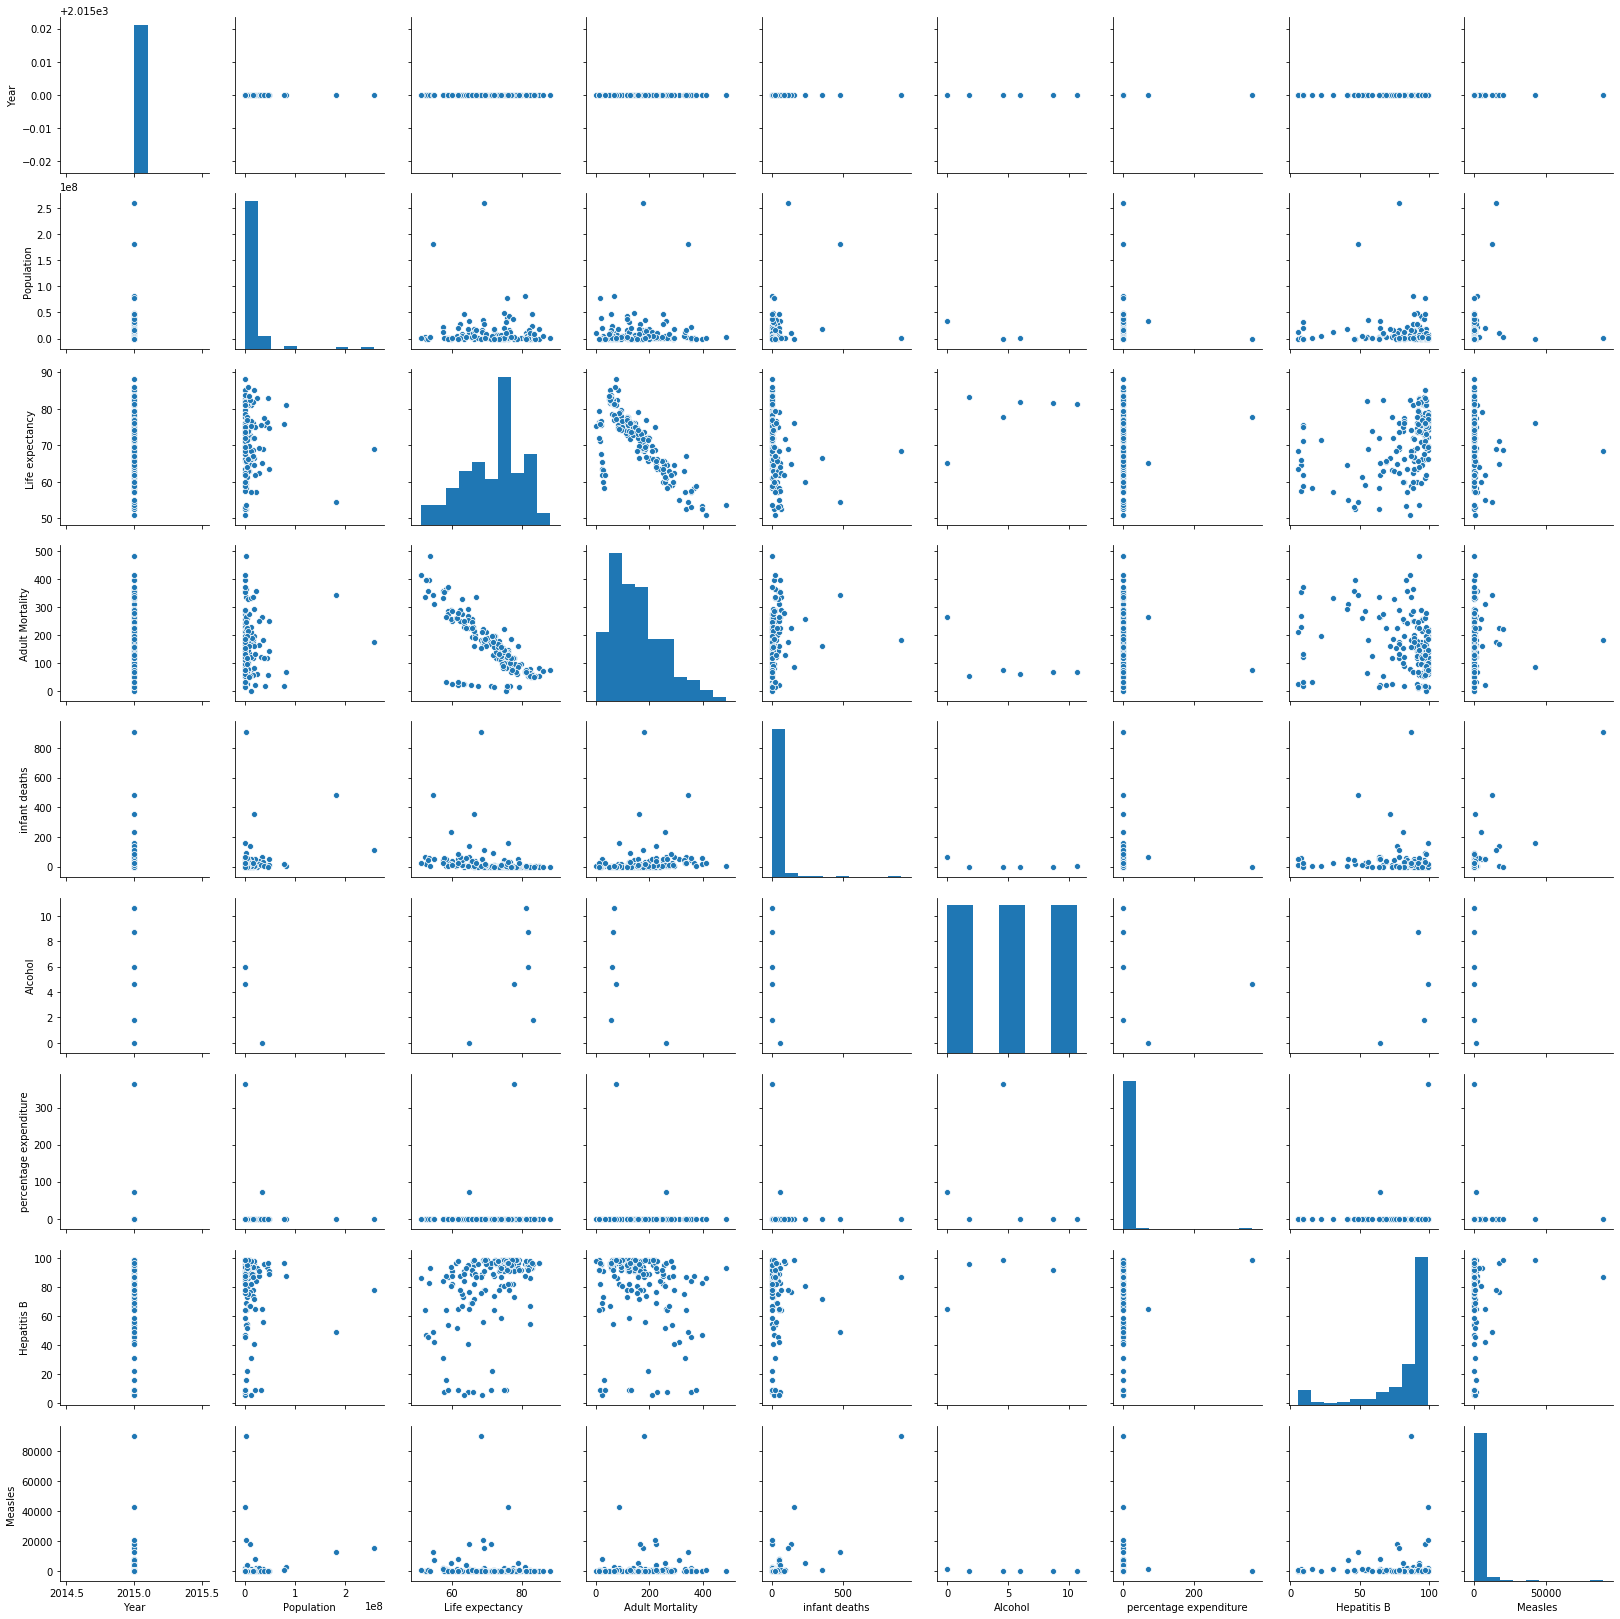

In [13]:
%time sns.pairplot(first_few_2015_df)

In [35]:
first_few_2015_df['Population'] # Show the column 'Population'

0      33736494.00
16        28873.00
32     39871528.00
48      2785935.00
64             nan
           ...    
2858           nan
2874           nan
2890           nan
2906     161587.00
2922   15777451.00
Name: Population, Length: 183, dtype: float64

In [15]:
first_few_2015_df['Life expectancy '] # <= Notice the extra space!

0      65.00
16     77.80
32     75.60
48     52.40
64     76.40
        ... 
2858   74.10
2874   76.00
2890   65.70
2906   61.80
2922   67.00
Name: Life expectancy , Length: 183, dtype: float64

#### Visualize the relationship between 'Population' and 'Life expectancy '

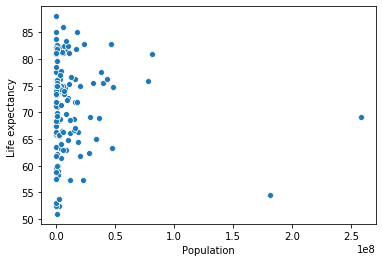

In [65]:
sns.scatterplot('Population', 'Life expectancy ', data=first_few_2015_df)

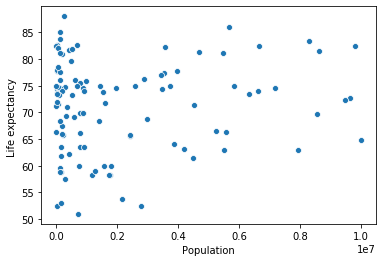

In [64]:
sns.scatterplot('Population', 'Life expectancy ', data=first_few_2015_df[first_few_2015_df.Population < 10_500_000])

In [60]:
TOOLTIPS = [('Country', '@Country')]

p = figure(title = "Pop vs Life expectancy", tooltips=TOOLTIPS)

p.circle('Population', 'Life expectancy ', source=first_few_2015_df,fill_alpha=0.2, size=10)
show(p)

In [16]:
first_few_2015_df['Life expectancy '].value_counts() # So what are common life expectancies?

75.00    4
74.80    3
63.50    3
65.70    3
75.50    3
        ..
76.60    1
72.10    1
63.10    1
66.10    1
65.00    1
Name: Life expectancy , Length: 132, dtype: int64

In [29]:
min(first_few_2015_df['Life expectancy ']), max(first_few_2015_df['Life expectancy '])

(51.0, 88.0)

In [39]:
min(first_few_2015_df['Population']), max(first_few_2015_df['Population'])

(2966.0, 258162113.0)

Previous list of numbers is not very useful, let's plot the distribution:

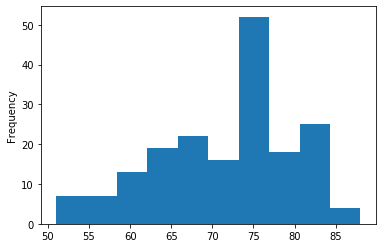

In [17]:
first_few_2015_df['Life expectancy '].plot.hist()

### Investigate infant deaths

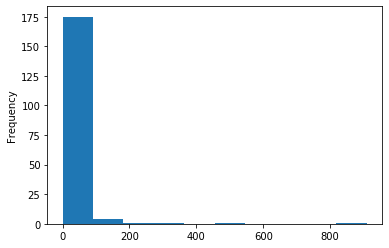

In [32]:
first_few_2015_df['infant deaths'].plot.hist()

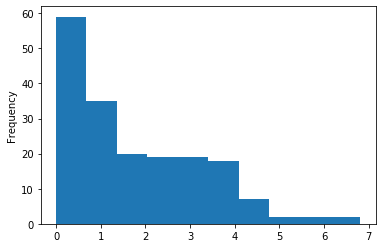

In [33]:
np.log(first_few_2015_df['infant deaths']+1).plot.hist() # just to "zoom" in quickly - dirty hack

In [20]:
#There are some cases where infant deaths are over 200???
first_few_2015_df[first_few_2015_df['infant deaths'] > 200]

Country  Year   Population  Life expectancy   \
721   Democratic Republic of the Congo  2015          nan             59.80   
1186                             India  2015   1395398.00             68.30   
1893                           Nigeria  2015 181181744.00             54.50   
1942                          Pakistan  2015  18938513.00             66.40   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
721            258.00            236      nan                    0.00   
1186           181.00            910      nan                    0.00   
1893           344.00            483      nan                    0.00   
1942           161.00            352      nan                    0.00   

      Hepatitis B  Measles   
721         81.00      5020  
1186        87.00     90387  
1893        49.00     12423  
1942        72.00       386

The numbers for infant deaths are _so_ high that we need to go back to the data source and double check our understanding.

**Exercise** Check the exact definition of 'infant deaths.'

The 'Measles' value is defined as 'number of reported cases per 1,000 population.' Let's find the actual number of measles per country (in 2015):

In [21]:
first_few_2015_df['Measles'] * first_few_2015_df['Population'] # What happened? (hint, extra space)
# Why did you get the error and have you seen that error before? 

KeyError: 'Measles'

In [ ]:
# In the calculation below, notice that we just added the two vectors, as if they were numbers...no loops!!
first_few_2015_df['Measles '] * first_few_2015_df['Population']

Something _very_ interesting happened above. We added two lists or vectors of numbers, without using a loop! Pandas and numpy (and matrix math) works this way.

Let's add this column back to our data frame:

In [ ]:
# We are creating a new column!
first_few_2015_df['Total Measles'] = first_few_2015_df['Measles '] * first_few_2015_df['Population']

In [ ]:
first_few_2015_df

### Cheap version of Pandas

Let's try to make a very tiny, very silly version of Pands ourselves.

The first implementation is just a dictionary with column names as keys and lists of data as values. Here is an example:

In [ ]:
import random

In [ ]:
df = {
   "col1": [random.random() for x in range(10)]
 , "col2": [random.random() for x in range(10)]
 , "col3": [random.random() for x in range(10)]
}
df

In [ ]:
df['col1']

#### Write a function to read csv files

In [ ]:
import collections

def create_df_from_csv(file):
    
    num_of_columns = None
    header = None
    df = collections.defaultdict(list)
    
    with open(file, "r") as f:
        for line in f:
            tokens = line.split(",") # recall that this is not the best way to parse csv files (python has a csv library built-in)
            if not num_of_columns: 
                num_of_columns = len(tokens) # count the number of columns in the first row
                header = [t.strip() for t in tokens] # assumes the first row will always contain header
            else:
                for idx, col in enumerate(header): df[col].append(tokens[idx].strip()) # assumes all rows have equal number of columns
    return df

For the next step, create a 10 line version of the file in datasets/life-expectancy, otherwise there will be too much data for you to see the structure of the dataframe (but the code should work, either way)

In [ ]:
le_df = create_df_from_csv("../../datasets/life-expectancy/life_expectancy_10.csv")
le_df

In [ ]:
le_df['Schooling']

**Exercise** The function above is not _production ready._ What are some ways things can go wrong?
**Exercise** How will classes combine the function (verb) and the dataframe data structure (noun)?